In [61]:
import pandas as pd

# Baca file Excel
file_path = "./Dataset/Dataset 3.xlsx"
df = pd.read_excel(file_path)
df

,R,G,B,Perlakuan,Pengambilan
0,90,123,101,1,1
1,134,138,124,1,1
2,120,135,97,1,1
3,101,155,102,1,1
4,105,163,70,1,1
...,...,...,...,...,...
1315,86,139,128,6,4
1316,120,165,97,6,4
1317,83,142,97,6,4
1318,88,175,96,6,4


In [62]:
# Hitung rata-rata R, G, dan B berdasarkan kombinasi Perlakuan dan Pengambilan
mean_rgb = df.groupby(['Perlakuan', 'Pengambilan'])[['R', 'G', 'B']].mean().reset_index()

# Tampilkan hasil
print("Rata-rata R, G, dan B per Perlakuan dan Pengambilan:")
print(mean_rgb)

Rata-rata R, G, dan B per Perlakuan dan Pengambilan:
    Perlakuan  Pengambilan           R           G           B
0           1            1  109.654545  149.236364   97.345455
1           1            2  108.745455  149.090909  101.200000
2           1            3  111.327273  147.036364  101.363636
3           1            4  107.836364  149.672727   95.109091
4           2            1  113.454545  149.472727   98.727273
5           2            2  109.509091  148.400000  101.509091
6           2            3  107.781818  151.909091   95.327273
7           2            4  113.381818  148.618182   98.636364
8           3            1  109.690909  152.054545   97.981818
9           3            2  110.509091  151.418182   97.690909
10          3            3  113.200000  148.018182  101.036364
11          3            4  111.127273  147.181818   98.400000
12          4            1  106.309091  149.690909  100.000000
13          4            2  112.654545  150.054545   95.709091
14

In [63]:
# Hitung Nilai Excess Green
mean_rgb['Excess_Green'] = (2 * mean_rgb['G']) - (mean_rgb['R'] + mean_rgb['B'])

# Menampilkan Hasil Nilai Excess Green
excess_green = mean_rgb[['Perlakuan', 'Pengambilan', 'Excess_Green']]
print(excess_green)

    Perlakuan  Pengambilan  Excess_Green
0           1            1     91.472727
1           1            2     88.236364
2           1            3     81.381818
3           1            4     96.400000
4           2            1     86.763636
5           2            2     85.781818
6           2            3    100.709091
7           2            4     85.218182
8           3            1     96.436364
9           3            2     94.636364
10          3            3     81.800000
11          3            4     84.836364
12          4            1     93.072727
13          4            2     91.745455
14          4            3     83.181818
15          4            4     94.381818
16          5            1     87.763636
17          5            2     79.654545
18          5            3     88.527273
19          5            4     84.600000
20          6            1     92.854545
21          6            2     91.963636
22          6            3     90.472727
23          6   

In [64]:
# Data nilai absorbansi per perlakuan
data = {
    'Perlakuan': [0, 1, 2, 3],
    'A665': [0.6247, 0.6780, 0.6781, 0.6888],
    'A645': [0.6494, 0.6959, 0.6960, 0.7056],
    'A669': [0.6179, 0.6719, 0.6720, 0.6822],
}

# Buat DataFrame
df_chlor = pd.DataFrame(data)
df_chlor

,Perlakuan,A665,A645,A669
0,0,0.6247,0.6494,0.6179
1,1,0.6780,0.6959,0.6719
2,2,0.6781,0.6960,0.6720
3,3,0.6888,0.7056,0.6822


In [65]:
# Hitung Klorofil A dan B
df_chlor['Klorofil_A'] = 12.7 * df_chlor['A665'] - 2.69 * df_chlor['A645']
df_chlor['Klorofil_B'] = 22.9 * df_chlor['A645'] - 4.68 * df_chlor['A669']
df_chlor['Total_Klorofil'] = 20.2 * df_chlor['A645'] + 8.02 * df_chlor['A665']

# Tampilkan hasil
print(df_chlor[['Perlakuan', 'Klorofil_A', 'Klorofil_B', 'Total_Klorofil']])

   Perlakuan  Klorofil_A  Klorofil_B  Total_Klorofil
0          0    6.186804   11.979488       18.127974
1          1    6.738629   12.791618       19.494740
2          2    6.739630   12.793440       19.497562
3          3    6.849696   12.965544       19.777296


In [66]:
combined = pd.merge(excess_green, df_chlor[['Perlakuan', 'Klorofil_A', 'Klorofil_B', 'Total_Klorofil']], on='Perlakuan')

print("Data Gabungan:")
print(combined)

Data Gabungan:
    Perlakuan  Pengambilan  Excess_Green  Klorofil_A  Klorofil_B  \
0           1            1     91.472727    6.738629   12.791618   
1           1            2     88.236364    6.738629   12.791618   
2           1            3     81.381818    6.738629   12.791618   
3           1            4     96.400000    6.738629   12.791618   
4           2            1     86.763636    6.739630   12.793440   
5           2            2     85.781818    6.739630   12.793440   
6           2            3    100.709091    6.739630   12.793440   
7           2            4     85.218182    6.739630   12.793440   
8           3            1     96.436364    6.849696   12.965544   
9           3            2     94.636364    6.849696   12.965544   
10          3            3     81.800000    6.849696   12.965544   
11          3            4     84.836364    6.849696   12.965544   

    Total_Klorofil  
0        19.494740  
1        19.494740  
2        19.494740  
3        19.4947

In [67]:
from sklearn.linear_model import LinearRegression
X = combined[['Excess_Green']]

# Model dan evaluasi untuk Klorofil A
y_A = combined['Klorofil_A']
model_A = LinearRegression()
model_A.fit(X, y_A)
combined['Prediksi_Klorofil_A'] = model_A.predict(X)

# Model dan evaluasi untuk Klorofil B
y_B = combined['Klorofil_B']
model_B = LinearRegression()
model_B.fit(X, y_B)
combined['Prediksi_Klorofil_B'] = model_B.predict(X)

# Model dan evaluasi untuk Total Klorofil
y_total = combined['Total_Klorofil']
model_total = LinearRegression()
model_total.fit(X, y_total)
combined['Prediksi_Total_Klorofil'] = model_total.predict(X)

In [68]:
# Tampilkan Hasil Prediksi Regresi Linier Klorofil A
print("Hasil Regresi Linier (Klorofil A)")
print(combined[['Perlakuan', 'Pengambilan', 'Excess_Green', 'Klorofil_A', 'Prediksi_Klorofil_A']])

Hasil Regresi Linier (Klorofil A)
    Perlakuan  Pengambilan  Excess_Green  Klorofil_A  Prediksi_Klorofil_A
0           1            1     91.472727    6.738629             6.775896
1           1            2     88.236364    6.738629             6.776040
2           1            3     81.381818    6.738629             6.776346
3           1            4     96.400000    6.738629             6.775676
4           2            1     86.763636    6.739630             6.776106
5           2            2     85.781818    6.739630             6.776150
6           2            3    100.709091    6.739630             6.775484
7           2            4     85.218182    6.739630             6.776175
8           3            1     96.436364    6.849696             6.775674
9           3            2     94.636364    6.849696             6.775755
10          3            3     81.800000    6.849696             6.776327
11          3            4     84.836364    6.849696             6.776192


In [69]:
# Tampilkan Hasil Prediksi Regresi Linier Klorofil B
print("Hasil Regresi Linier (Klorofil B)")
print(combined[['Perlakuan', 'Pengambilan', 'Excess_Green', 'Klorofil_B', 'Prediksi_Klorofil_B']])

Hasil Regresi Linier (Klorofil B)
    Perlakuan  Pengambilan  Excess_Green  Klorofil_B  Prediksi_Klorofil_B
0           1            1     91.472727   12.791618            12.850062
1           1            2     88.236364   12.791618            12.850287
2           1            3     81.381818   12.791618            12.850763
3           1            4     96.400000   12.791618            12.849719
4           2            1     86.763636   12.793440            12.850389
5           2            2     85.781818   12.793440            12.850457
6           2            3    100.709091   12.793440            12.849420
7           2            4     85.218182   12.793440            12.850496
8           3            1     96.436364   12.965544            12.849717
9           3            2     94.636364   12.965544            12.849842
10          3            3     81.800000   12.965544            12.850734
11          3            4     84.836364   12.965544            12.850523


In [70]:
# Tampilkan Hasil Prediksi Regresi Linier Total Klorofil
print("Hasil Regresi Linier (Total Klorofil)")
print(combined[['Perlakuan', 'Pengambilan', 'Excess_Green', 'Total_Klorofil', 'Prediksi_Total_Klorofil']])

Hasil Regresi Linier (Total Klorofil)
    Perlakuan  Pengambilan  Excess_Green  Total_Klorofil  \
0           1            1     91.472727       19.494740   
1           1            2     88.236364       19.494740   
2           1            3     81.381818       19.494740   
3           1            4     96.400000       19.494740   
4           2            1     86.763636       19.497562   
5           2            2     85.781818       19.497562   
6           2            3    100.709091       19.497562   
7           2            4     85.218182       19.497562   
8           3            1     96.436364       19.777296   
9           3            2     94.636364       19.777296   
10          3            3     81.800000       19.777296   
11          3            4     84.836364       19.777296   

    Prediksi_Total_Klorofil  
0                 19.589640  
1                 19.590006  
2                 19.590781  
3                 19.589083  
4                 19.590172  
5

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fungsi evaluasi
def evaluasi_model(y_true, y_pred, nama_target):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"\n=== Evaluasi Model Regresi (ExG → {nama_target}) ===")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"MAPE : {mape:.2f}%")
    print(f"R²   : {r2:.4f}")

# Evaluasi untuk Klorofil A
evaluasi_model(combined['Klorofil_A'], combined['Prediksi_Klorofil_A'], 'Klorofil A')

# Evaluasi untuk Klorofil B
evaluasi_model(combined['Klorofil_B'], combined['Prediksi_Klorofil_B'], 'Klorofil B')

# Evaluasi untuk Total Klorofil
evaluasi_model(combined['Total_Klorofil'], combined['Prediksi_Total_Klorofil'], 'Total Klorofil')



=== Evaluasi Model Regresi (ExG → Klorofil A) ===
MAE  : 0.0491
MSE  : 0.0027
MAPE : 0.72%
R²   : 0.0000

=== Evaluasi Model Regresi (ExG → Klorofil B) ===
MAE  : 0.0769
MSE  : 0.0067
MAPE : 0.60%
R²   : 0.0000

=== Evaluasi Model Regresi (ExG → Total Klorofil) ===
MAE  : 0.1249
MSE  : 0.0176
MAPE : 0.64%
R²   : 0.0000


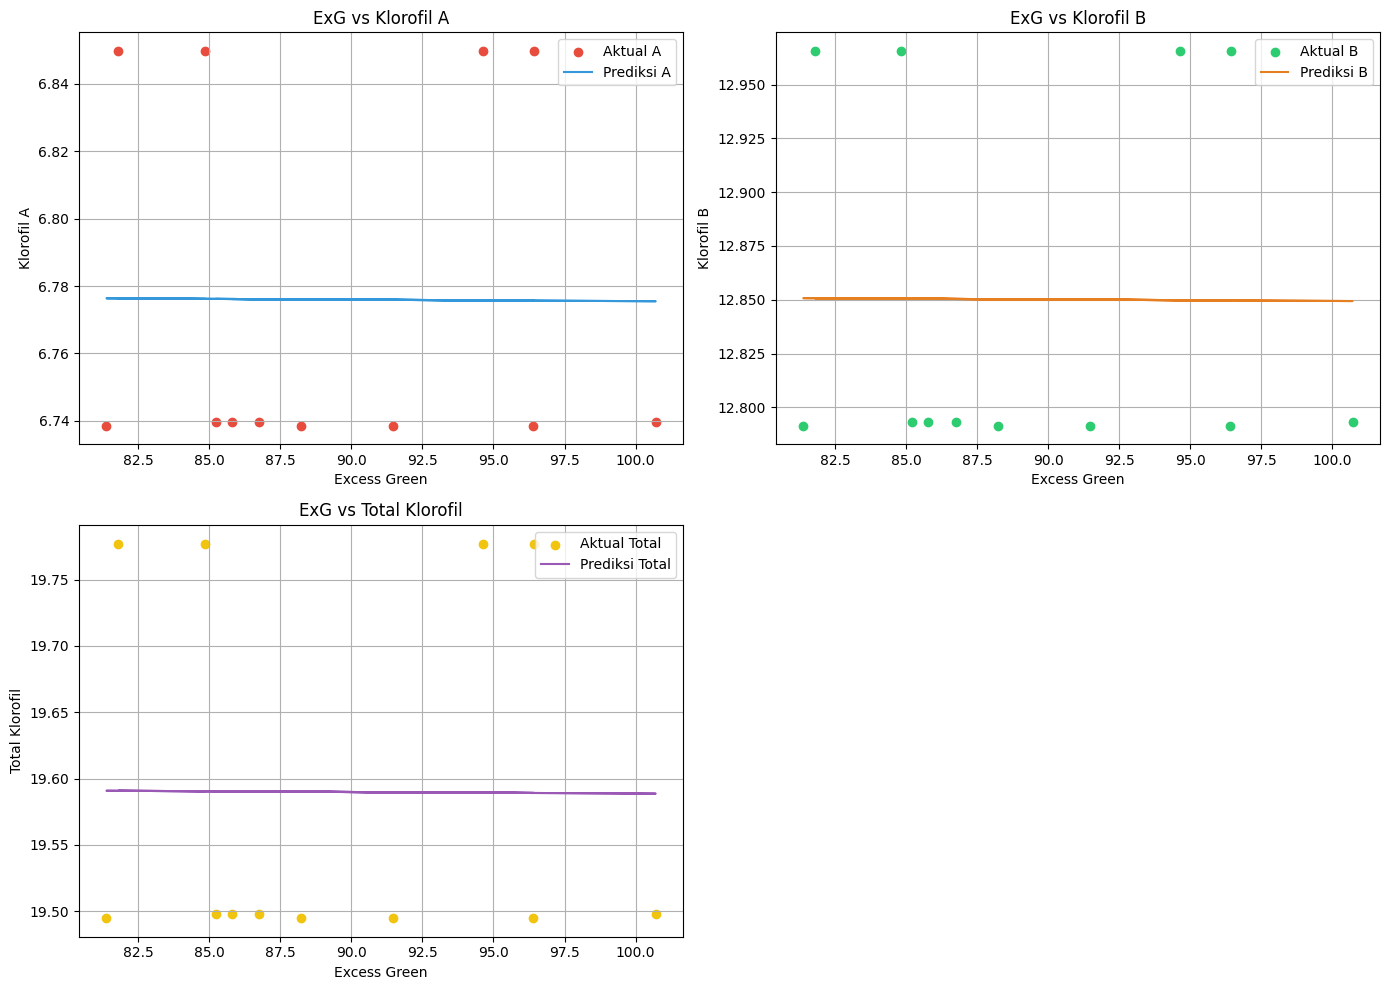

In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2)

# Subplot Klorofil A
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(combined['Excess_Green'], combined['Klorofil_A'], color='#e74c3c', label='Aktual A')
ax1.plot(combined['Excess_Green'], combined['Prediksi_Klorofil_A'], color='#3498db', label='Prediksi A')
ax1.set_title('ExG vs Klorofil A')
ax1.set_xlabel('Excess Green')
ax1.set_ylabel('Klorofil A')
ax1.legend()
ax1.grid(True)

# Subplot Klorofil B
ax2 = plt.subplot(gs[0, 1])
ax2.scatter(combined['Excess_Green'], combined['Klorofil_B'], color='#2ecc71', label='Aktual B')
ax2.plot(combined['Excess_Green'], combined['Prediksi_Klorofil_B'], color='#e67e22', label='Prediksi B')
ax2.set_title('ExG vs Klorofil B')
ax2.set_xlabel('Excess Green')
ax2.set_ylabel('Klorofil B')
ax2.legend()
ax2.grid(True)

# Subplot Total Klorofil
ax3 = plt.subplot(gs[1, 0])
ax3.scatter(combined['Excess_Green'], combined['Total_Klorofil'], color='#f1c40f', label='Aktual Total')
ax3.plot(combined['Excess_Green'], combined['Prediksi_Total_Klorofil'], color='#9b59b6', label='Prediksi Total')
ax3.set_title('ExG vs Total Klorofil')
ax3.set_xlabel('Excess Green')
ax3.set_ylabel('Total Klorofil')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.savefig()

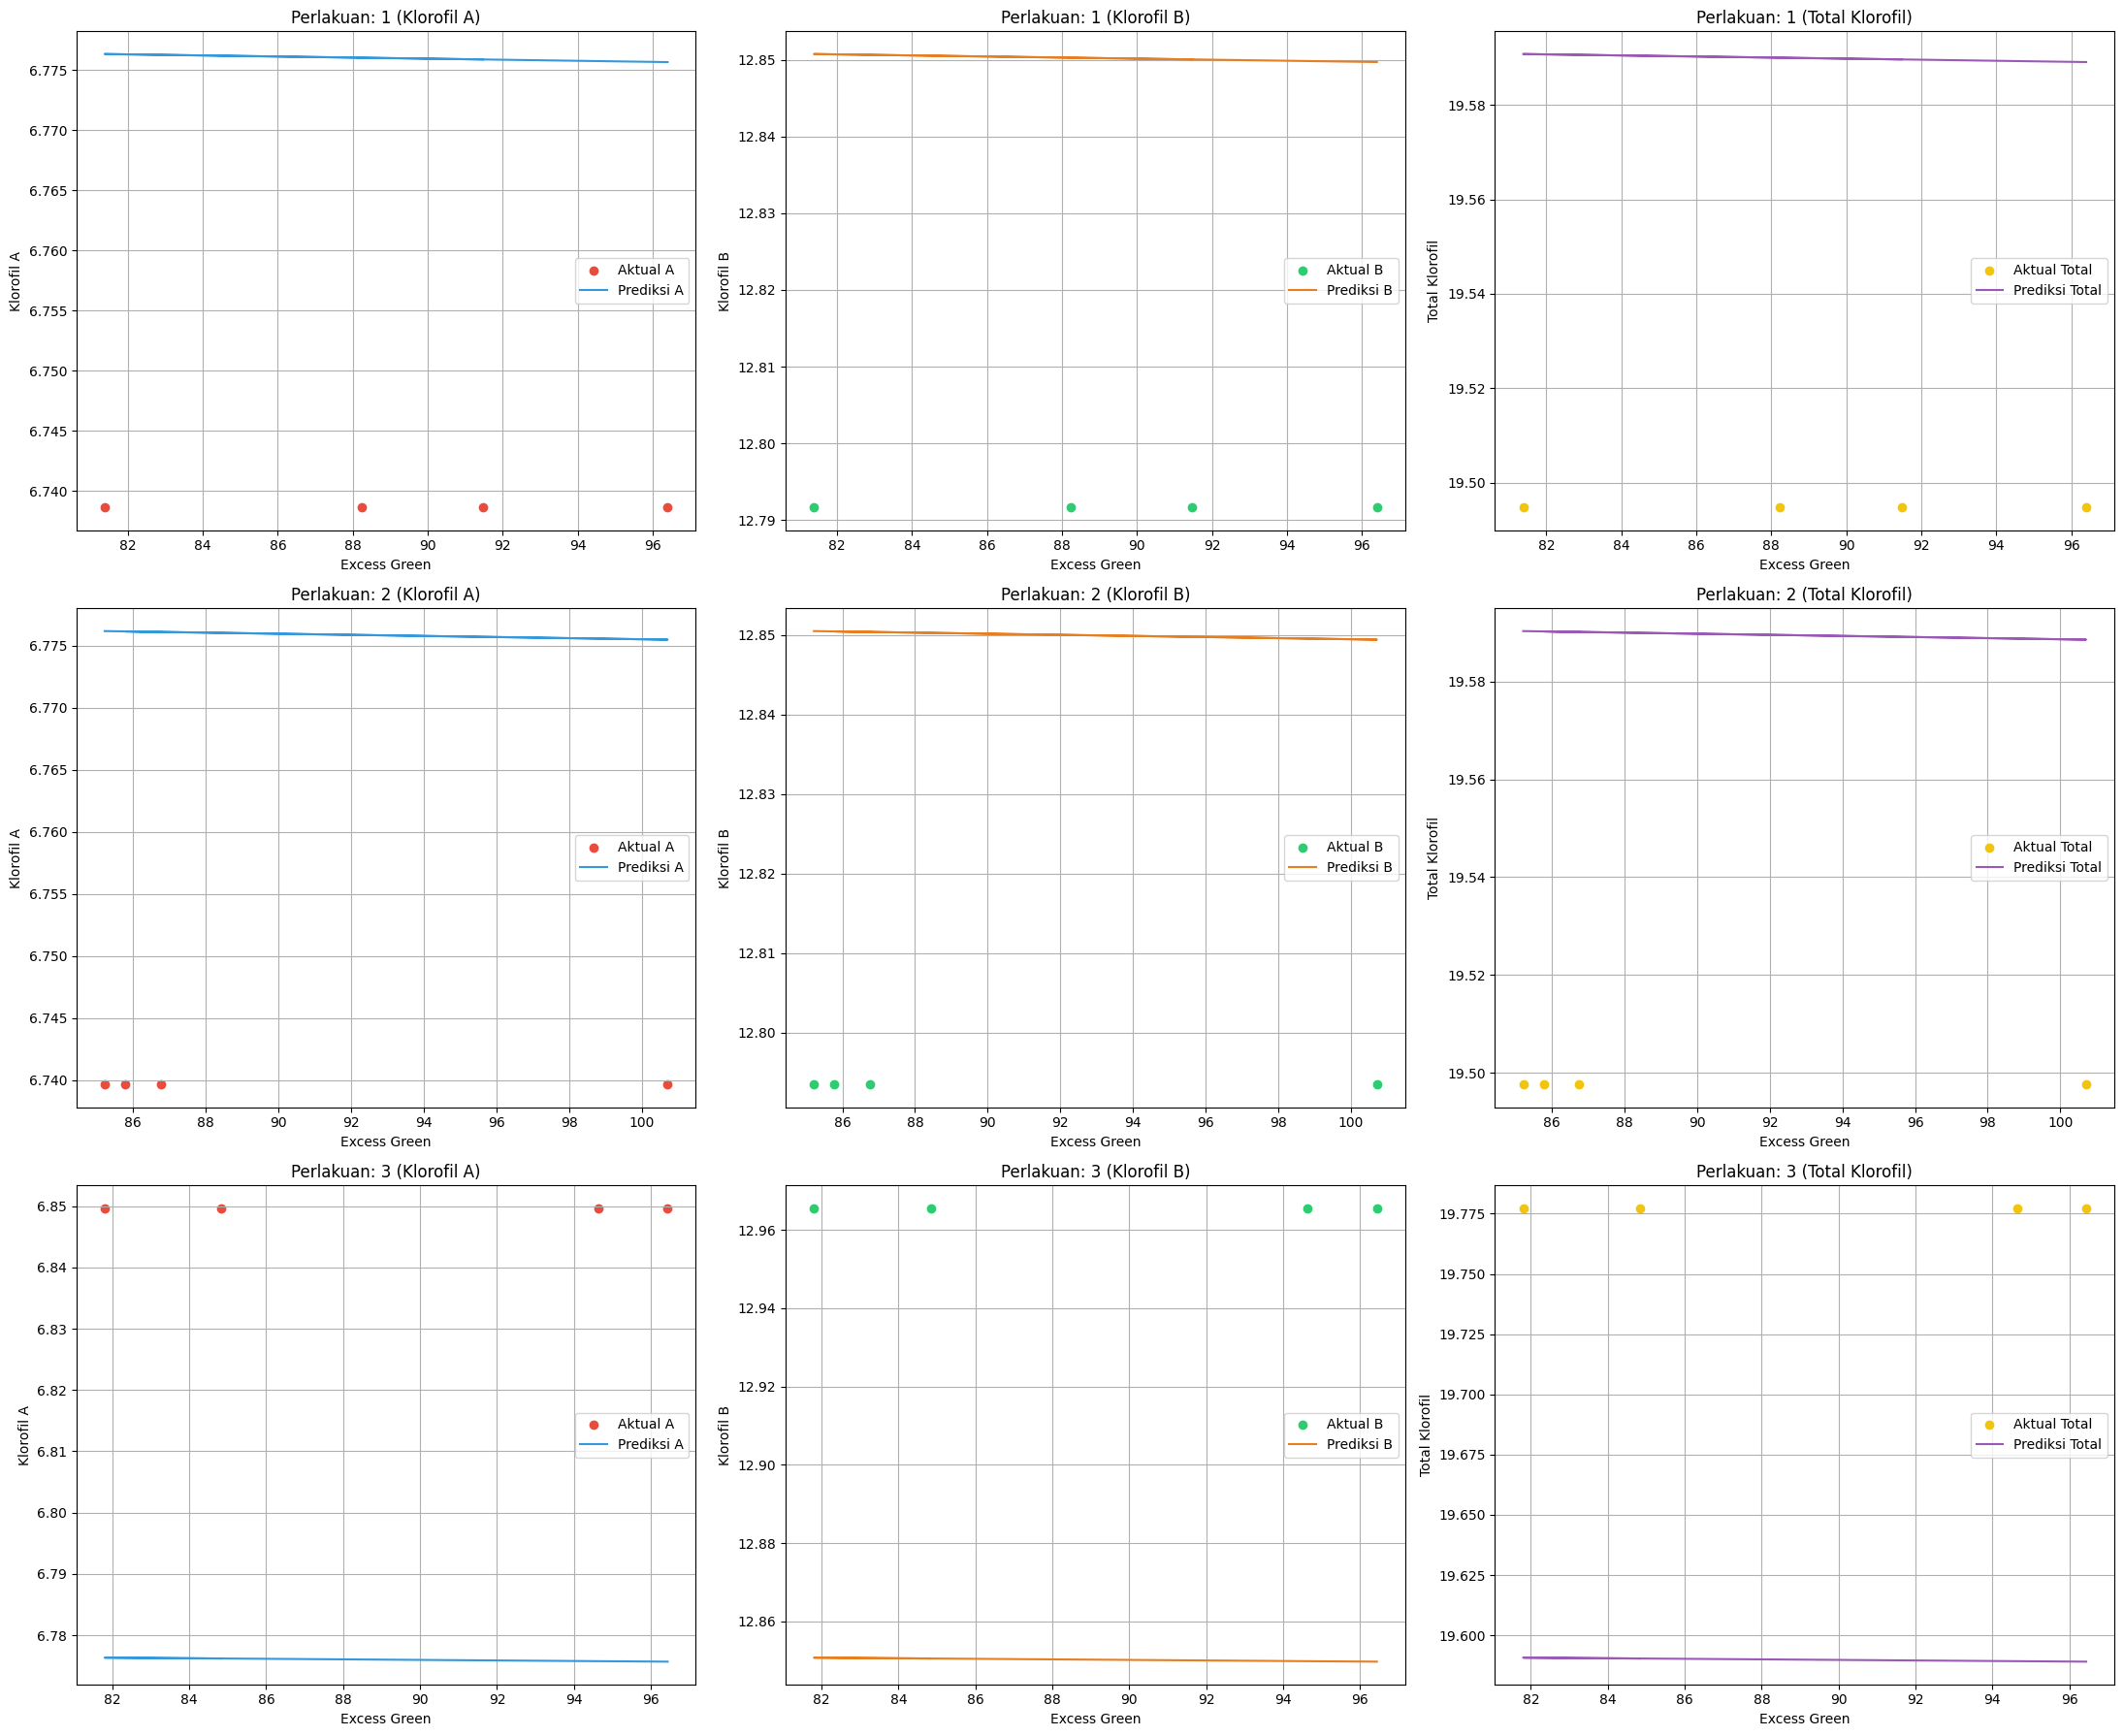

In [73]:
perlakuan_list = combined['Perlakuan'].unique()

# Buat plot
fig, axs = plt.subplots(len(perlakuan_list), 3, figsize=(22, 6 * len(perlakuan_list)))

for i, perlakuan in enumerate(perlakuan_list):
    subset = combined[combined['Perlakuan'] == perlakuan]
    
    # Subplot Klorofil A
    axs[i, 0].scatter(subset['Excess_Green'], subset['Klorofil_A'], color='#e74c3c', label='Aktual A')
    axs[i, 0].plot(subset['Excess_Green'], subset['Prediksi_Klorofil_A'], color='#3498db', label='Prediksi A')
    axs[i, 0].set_title(f'Perlakuan: {perlakuan} (Klorofil A)')
    axs[i, 0].set_xlabel('Excess Green')
    axs[i, 0].set_ylabel('Klorofil A')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Subplot Klorofil B
    axs[i, 1].scatter(subset['Excess_Green'], subset['Klorofil_B'], color='#2ecc71', label='Aktual B')
    axs[i, 1].plot(subset['Excess_Green'], subset['Prediksi_Klorofil_B'], color='#e67e22', label='Prediksi B')
    axs[i, 1].set_title(f'Perlakuan: {perlakuan} (Klorofil B)')
    axs[i, 1].set_xlabel('Excess Green')
    axs[i, 1].set_ylabel('Klorofil B')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

    # Subplot Total Klorofil
    axs[i, 2].scatter(subset['Excess_Green'], subset['Total_Klorofil'], color='#f1c40f', label='Aktual Total')
    axs[i, 2].plot(subset['Excess_Green'], subset['Prediksi_Total_Klorofil'], color='#9b59b6', label='Prediksi Total')
    axs[i, 2].set_title(f'Perlakuan: {perlakuan} (Total Klorofil)')
    axs[i, 2].set_xlabel('Excess Green')
    axs[i, 2].set_ylabel('Total Klorofil')
    axs[i, 2].legend()
    axs[i, 2].grid(True)

plt.tight_layout()
plt.show()


In [74]:
import joblib

joblib.dump(model_A, 'model_klorofil_a_linear.pkl')
joblib.dump(model_B, 'model_klorofil_b_linear.pkl')
joblib.dump(model_total, 'model_klorofil_total_linear.pkl')

['model_klorofil_total_linear.pkl']

In [75]:
# --- STATISTICAL SUMMARY ---
print("=== Ringkasan Statistik Data ===")
print(combined[['Excess_Green', 'Klorofil_A', 'Klorofil_B', 'Total_Klorofil']].describe())

=== Ringkasan Statistik Data ===
       Excess_Green  Klorofil_A  Klorofil_B  Total_Klorofil
count     12.000000   12.000000   12.000000       12.000000
mean      89.472727    6.775985   12.850201       19.589866
std        6.323258    0.054441    0.085190        0.138431
min       81.381818    6.738629   12.791618       19.494740
25%       85.122727    6.738629   12.791618       19.494740
50%       87.500000    6.739630   12.793440       19.497562
75%       95.077273    6.849696   12.965544       19.777296
max      100.709091    6.849696   12.965544       19.777296
